In [9]:
# Regresión logística (Clasificacion)
# - Binaria -> 2 resultados
# - Multinomial -> 3 o más categorias nominales (tipos de vino)
# - Ordinal -> 3 o más categorías ordinales (calificar un producto del 1 al 5 por ejemplo)
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('datasets/usuarios_win_mac_lin.csv')
dataset.head(10)

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
5,125.0,5,10,20,2
6,133.0,2,2,4,2
7,162.0,2,6,12,2
8,170.0,2,4,8,2
9,217.0,2,6,6,2


In [10]:
# Imprimir cuantas clases hay y cantidad
print(dataset.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


<Figure size 1224x360 with 0 Axes>

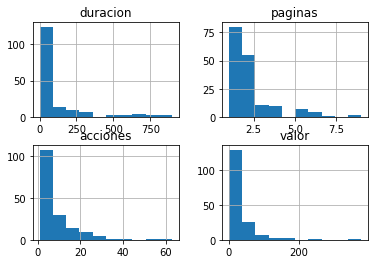

In [14]:
plt.figure(figsize=(17,5))
dataset.drop(columns='clase').hist()
plt.show()

In [16]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

modelo_RL = linear_model.LogisticRegression(solver='lbfgs', max_iter=1000)

X = dataset.drop('clase', axis=1)
Y = dataset['clase']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=.80, random_state=1)
modelo_RL.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
prediccion = modelo_RL.predict(X_test)

In [20]:
print('Matriz de confusión:\n', metrics.confusion_matrix(y_test, prediccion))

Matriz de confusión:
 [[11  0  2]
 [ 9  1  0]
 [ 2  0  9]]


In [21]:
print('Tasa de acierto: {:4f}'.format(metrics.accuracy_score(y_test,prediccion)))

Tasa de acierto: 0.617647


In [22]:
print('Reporte de clasificación:\n')
print(metrics.classification_report(y_test, prediccion))

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.50      0.85      0.63        13
           1       1.00      0.10      0.18        10
           2       0.82      0.82      0.82        11

    accuracy                           0.62        34
   macro avg       0.77      0.59      0.54        34
weighted avg       0.75      0.62      0.56        34

